## Notebook Content

In this notebook, choosing of the best classification model for the labeled data and reporting the final model

## Import Libraries

In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score,f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import xgboost as xgb
from sklearn.naive_bayes import BernoulliNB, GaussianNB

### Methods to Use Amoung File

In [2]:
def read_pickle(file_name):
    """...."""
    with open(file_name , 'rb') as handle:
        return pickle.load(handle)

In [3]:
def getScores(model_,X_train_, y_train_, X_val_, y_val_, y_pred_):
    """
    This method gets all the needed scores (accuracy, precision, recall and f1) 
    from the training/validation sets after getting the model, x train and
    validation, y train and validation, and the y predicted
    """
    print("Training Score ",model_.score(X_train_, y_train_))
    print("Validation Score ",model_.score(X_val_, y_val_))
    print("Precision: {:6.4f},   Recall: {:6.4f}, f1: {:6.4f}".format(precision_score(y_val_, y_pred_, average='micro'), 
                                                         recall_score(y_val_, y_pred_, average='micro'),f1_score(y_val_,y_pred_,average='micro')))

In [4]:
def make_confusion_matrix(model, threshold=0.5):
    """
    This method draws the confusion matrixs for each given model
    """
    y_predict = (model.predict_proba(X_val)[:, 1] >= threshold)
    avtivity_confusion = confusion_matrix(y_val.astype(str), y_predict.astype(str))
    plt.figure(dpi=100)
    sns.heatmap(avtivity_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels= X_val.columns,
           yticklabels= X_val.columns);
    plt.xlabel('prediction')
    plt.ylabel('actual')

### Read Data from pickles

In [5]:
data = read_pickle('Resumes.pickle')
data2 = read_pickle('Resumes_PDF.pickle')

In [6]:
data.rename(columns = {'hospitality': 'Hospitality'}, inplace = True)

In [7]:
data4 = data2['Accounting']
data4['Accounting2'] = data4.sum(axis=1)  
data2.drop('Accounting', axis = 1, inplace = True)
data2['Accounting'] = data4['Accounting2']
data2['Business_Administration'] = 0
data2['Management_Information_System'] = 0
data2['Risk_Management'] = 0
data2['Law'] = 0
data2['Graphics_Design'] = 0
data2['Teaching'] = 0
data2['Development'] = 0
data2

/var/folders/5w/wm8hgb2j05790d69l1zpj_br0000gn/T/ipykernel_26263/2029456405.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4['Accounting2'] = data4.sum(axis=1)


,Finance,Hospitality,Electrical_and_Mechanical_Engineering,Investment,Beauty_Artist,Sales_and_Marketing,Others,Secretarial,Health,Topic_Name,Accounting,Business_Administration,Management_Information_System,Risk_Management,Law,Graphics_Design,Teaching,Development
0,0.004054,0.000000,0.000000,0.000000,0.189757,0.000000,0.035782,0.000000,0.044070,Beauty_Artist,0.000000,0,0,0,0,0,0,0
1,0.005484,0.000000,0.007402,0.000264,0.000000,0.000000,0.049863,0.045771,0.008719,Others,0.001476,0,0,0,0,0,0,0
2,0.051335,0.002783,0.003110,0.004247,0.000000,0.000000,0.032882,0.000000,0.007595,Finance,0.009449,0,0,0,0,0,0,0
3,0.000000,0.000000,0.004867,0.136537,0.000000,0.000000,0.001165,0.000000,0.000000,Investment,0.000000,0,0,0,0,0,0,0
4,0.008167,0.000000,0.117987,0.002000,0.000999,0.010112,0.004369,0.003286,0.005928,Electrical_and_Mechanical_Engineering,0.011784,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,0.000000,0.002670,0.004208,0.000000,0.017459,0.000000,0.002475,0.000590,0.098240,Health,0.071251,0,0,0,0,0,0,0
1530,0.096746,0.000000,0.000000,0.000644,0.080824,0.000000,0.002349,0.001031,0.006702,Finance,0.000000,0,0,0,0,0,0,0
1531,0.000000,0.000975,0.015125,0.003125,0.005279,0.009689,0.028183,0.120429,0.011660,Secretarial,0.002119,0,0,0,0,0,0,0
1532,0.035690,0.004312,0.000782,0.002228,0.000000,0.000000,0.029226,0.000000,0.014519,Finance,0.004466,0,0,0,0,0,0,0


In [8]:
data['Others'] = 0
data['Investment'] = 0
data['Beauty_Artist'] = 0
data['Secretarial'] = 0
data

,Business_Administration,Sales_and_Marketing,Accounting,Management_Information_System,Risk_Management,Law,Electrical_and_Mechanical_Engineering,Health,Graphics_Design,Finance,Teaching,Development,Hospitality,Topic_Name,Others,Investment,Beauty_Artist,Secretarial
0,0.032543,0.000000,0.009129,0.000000,0.000000,0.004585,0.006533,0.005837,0.000000,0.000000,0.008140,0.082734,0.019442,Development,0,0,0,0
1,0.013037,0.000000,0.000283,0.000000,0.000000,0.000000,0.007466,0.001866,0.005597,0.005226,0.002370,0.009804,0.000000,Business_Administration,0,0,0,0
2,0.006065,0.005259,0.000000,0.000000,0.000911,0.000000,0.065736,0.000000,0.000000,0.000000,0.000000,0.062517,0.005494,Electrical_and_Mechanical_Engineering,0,0,0,0
3,0.057875,0.002075,0.016386,0.000000,0.000000,0.000000,0.006083,0.001682,0.000000,0.000000,0.000000,0.099080,0.016166,Development,0,0,0,0
4,0.006198,0.000000,0.004409,0.009089,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.032625,0.000000,Development,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008213,0.000000,0.000000,0.096720,0.000000,0.109217,hospitality,0,0,0,0
1251,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.164186,hospitality,0,0,0,0
1252,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000227,0.002486,0.000000,0.000548,0.000000,0.000000,0.142078,hospitality,0,0,0,0
1253,0.004238,0.000000,0.000000,0.010889,0.000000,0.006974,0.001992,0.004350,0.000000,0.000000,0.038494,0.000000,0.050663,hospitality,0,0,0,0


In [9]:
data = pd.concat([data, data2])

In [10]:
data.index = range(0, 2789)
data

,Business_Administration,Sales_and_Marketing,Accounting,Management_Information_System,Risk_Management,Law,Electrical_and_Mechanical_Engineering,Health,Graphics_Design,Finance,Teaching,Development,Hospitality,Topic_Name,Others,Investment,Beauty_Artist,Secretarial
0,0.032543,0.000000,0.009129,0.000000,0.000000,0.004585,0.006533,0.005837,0.000000,0.000000,0.00814,0.082734,0.019442,Development,0.000000,0.000000,0.000000,0.000000
1,0.013037,0.000000,0.000283,0.000000,0.000000,0.000000,0.007466,0.001866,0.005597,0.005226,0.00237,0.009804,0.000000,Business_Administration,0.000000,0.000000,0.000000,0.000000
2,0.006065,0.005259,0.000000,0.000000,0.000911,0.000000,0.065736,0.000000,0.000000,0.000000,0.00000,0.062517,0.005494,Electrical_and_Mechanical_Engineering,0.000000,0.000000,0.000000,0.000000
3,0.057875,0.002075,0.016386,0.000000,0.000000,0.000000,0.006083,0.001682,0.000000,0.000000,0.00000,0.099080,0.016166,Development,0.000000,0.000000,0.000000,0.000000
4,0.006198,0.000000,0.004409,0.009089,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.032625,0.000000,Development,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2784,0.000000,0.000000,0.071251,0.000000,0.000000,0.000000,0.004208,0.098240,0.000000,0.000000,0.00000,0.000000,0.002670,Health,0.002475,0.000000,0.017459,0.000590
2785,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006702,0.000000,0.096746,0.00000,0.000000,0.000000,Finance,0.002349,0.000644,0.080824,0.001031
2786,0.000000,0.009689,0.002119,0.000000,0.000000,0.000000,0.015125,0.011660,0.000000,0.000000,0.00000,0.000000,0.000975,Secretarial,0.028183,0.003125,0.005279,0.120429
2787,0.000000,0.000000,0.004466,0.000000,0.000000,0.000000,0.000782,0.014519,0.000000,0.035690,0.00000,0.000000,0.004312,Finance,0.029226,0.002228,0.000000,0.000000


In [11]:
#Checking for nulls
data.isnull().sum()

Business_Administration                  0
Sales_and_Marketing                      0
Accounting                               0
Management_Information_System            0
Risk_Management                          0
Law                                      0
Electrical_and_Mechanical_Engineering    0
Health                                   0
Graphics_Design                          0
Finance                                  0
Teaching                                 0
Development                              0
Hospitality                              0
Topic_Name                               0
Others                                   0
Investment                               0
Beauty_Artist                            0
Secretarial                              0
dtype: int64

In [12]:
X = data.drop('Topic_Name', axis = 1)
y = data.Topic_Name

In [13]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=.2, random_state=77)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=77)

In [14]:
print('X_train  ==> ',X_train.shape)
print('y_train  ==> ',y_train.shape)
print()
print('X_val    ==> ',X_val.shape)
print('y_val    ==> ',y_val.shape)
print()
print('X_test   ==> ',X_test.shape)
print('y_test   ==> ',y_test.shape)

X_train  ==>  (2231, 17)
y_train  ==>  (2231,)

X_val    ==>  (279, 17)
y_val    ==>  (279,)

X_test   ==>  (279, 17)
y_test   ==>  (279,)


In [15]:
y_train.value_counts() # Value count for each class. imbalanced!

Accounting                               248
Finance                                  225
Others                                   215
Health                                   204
Electrical_and_Mechanical_Engineering    196
Sales_and_Marketing                      172
Development                              151
Beauty_Artist                            126
Investment                               102
Teaching                                  98
hospitality                               95
Secretarial                               87
Graphics_Design                           82
Management_Information_System             61
Business_Administration                   56
Law                                       48
Risk_Management                           38
Hospitality                               27
Name: Topic_Name, dtype: int64

/Users/shahadsulaiman/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/shahadsulaiman/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/shahadsulaiman/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/shahadsulaiman/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/shahadsulaiman/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/shahadsulaiman/opt/anaconda3/lib/

/Users/shahadsulaiman/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/shahadsulaiman/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/shahadsulaiman/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/shahadsulaiman/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/shahadsulaiman/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/shahadsulaiman/opt/anaconda3/lib/

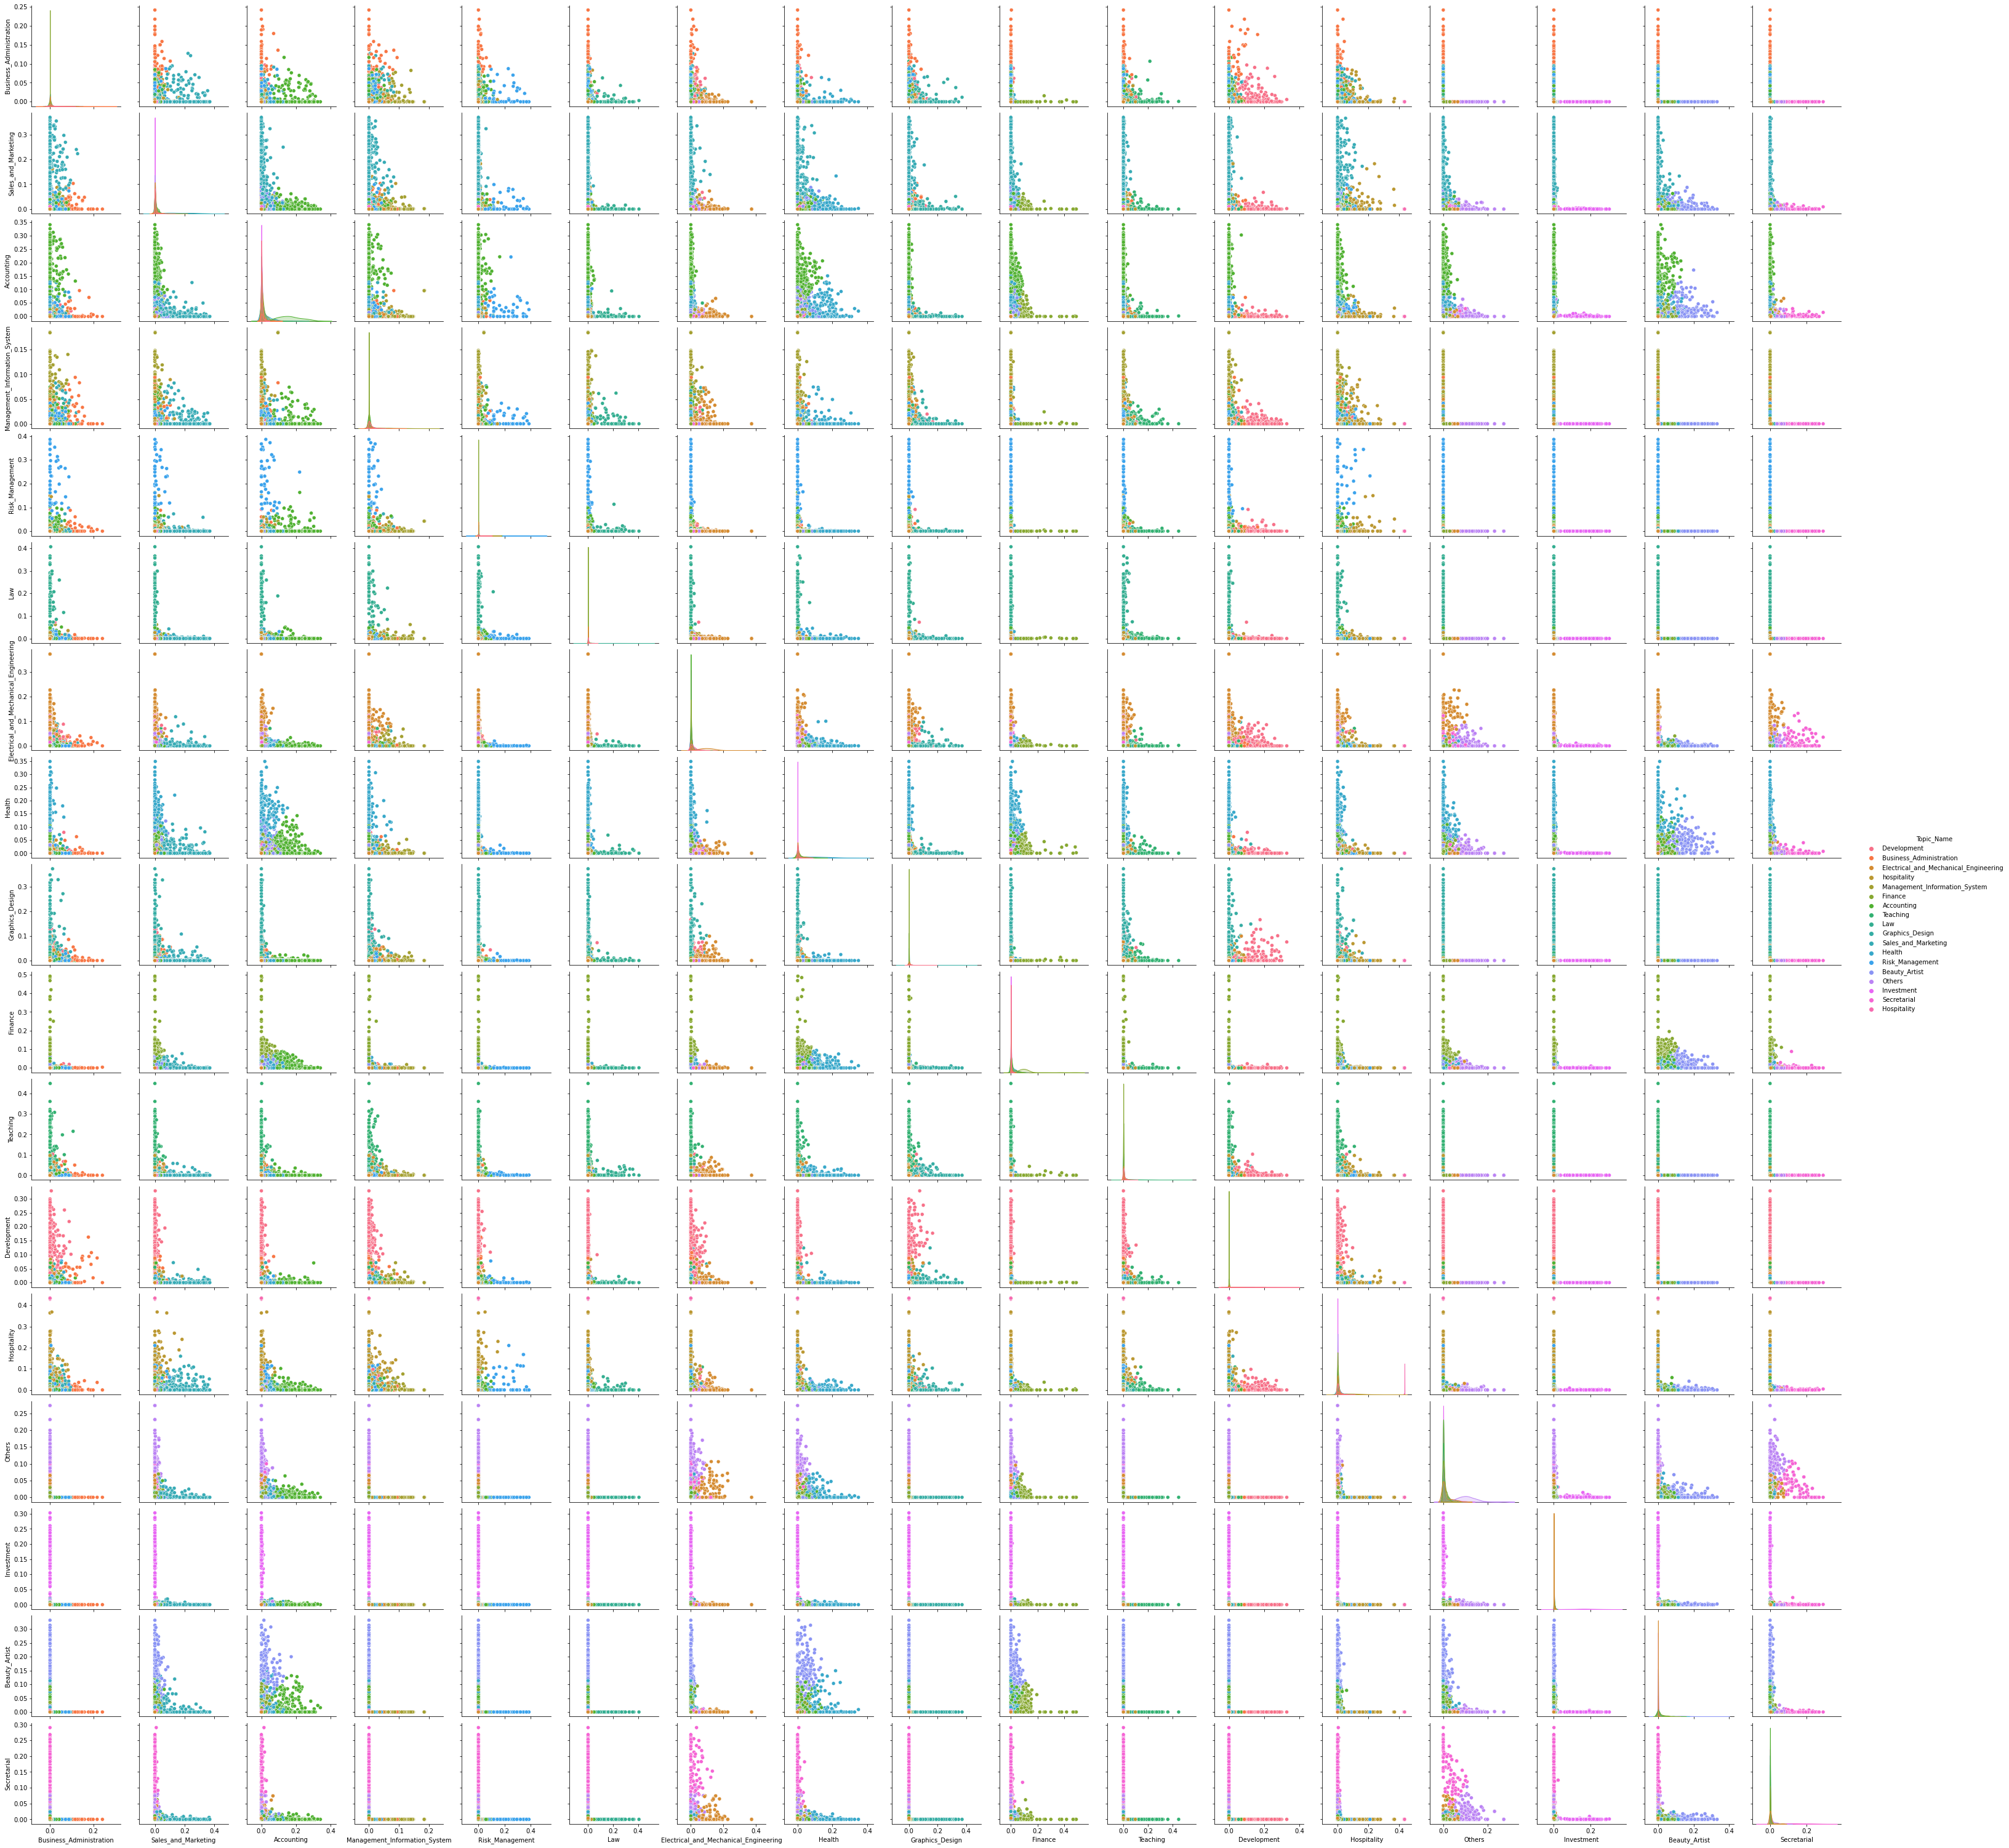

In [16]:
sns.pairplot(data = data, hue='Topic_Name')

In [17]:
corr = data.corr()
corr

,Business_Administration,Sales_and_Marketing,Accounting,Management_Information_System,Risk_Management,Law,Electrical_and_Mechanical_Engineering,Health,Graphics_Design,Finance,Teaching,Development,Hospitality,Others,Investment,Beauty_Artist,Secretarial
Business_Administration,1.000000,0.099870,-0.007115,0.214113,0.096900,-0.000173,-0.044528,-0.107680,0.055771,-0.132861,0.019953,0.142004,0.011006,-0.141509,-0.071028,-0.116756,-0.082622
Sales_and_Marketing,0.099870,1.000000,-0.069319,0.014063,-0.003895,-0.047376,-0.087958,-0.036461,-0.026221,-0.082201,-0.054195,-0.070789,0.035921,-0.110451,-0.071767,-0.048455,-0.073238
Accounting,-0.007115,-0.069319,1.000000,-0.041158,0.052487,-0.056209,-0.137969,0.059692,-0.105584,-0.024558,-0.094823,-0.115423,-0.090545,-0.120137,-0.088712,0.079621,-0.084012
Management_Information_System,0.214113,0.014063,-0.041158,1.000000,0.057701,0.037205,-0.026939,-0.094269,0.012357,-0.137430,0.016184,0.006733,0.036760,-0.151181,-0.075883,-0.124736,-0.088268
Risk_Management,0.096900,-0.003895,0.052487,0.057701,1.000000,0.008490,-0.061011,-0.077880,-0.030690,-0.075868,-0.025212,-0.013805,0.085810,-0.078079,-0.039191,-0.064422,-0.045587
Law,-0.000173,-0.047376,-0.056209,0.037205,0.008490,1.000000,-0.048896,-0.058075,-0.014105,-0.069489,0.023619,-0.034012,-0.023275,-0.074557,-0.037423,-0.061516,-0.043531
Electrical_and_Mechanical_Engineering,-0.044528,-0.087958,-0.137969,-0.026939,-0.061011,-0.048896,1.000000,-0.112491,0.000458,-0.122575,-0.028552,0.001412,-0.068929,0.024605,-0.079418,-0.115923,0.061586
Health,-0.107680,-0.036461,0.059692,-0.094269,-0.077880,-0.058075,-0.112491,1.000000,-0.094670,0.039325,-0.066630,-0.116520,-0.089489,-0.072728,-0.090232,0.142795,-0.078065
Graphics_Design,0.055771,-0.026221,-0.105584,0.012357,-0.030690,-0.014105,0.000458,-0.094670,1.000000,-0.100388,0.032786,0.114845,-0.005334,-0.107952,-0.054185,-0.089069,-0.063029
Finance,-0.132861,-0.082201,-0.024558,-0.137430,-0.075868,-0.069489,-0.122575,0.039325,-0.100388,1.000000,-0.096735,-0.120247,-0.100244,-0.086726,-0.075791,0.146935,-0.063665


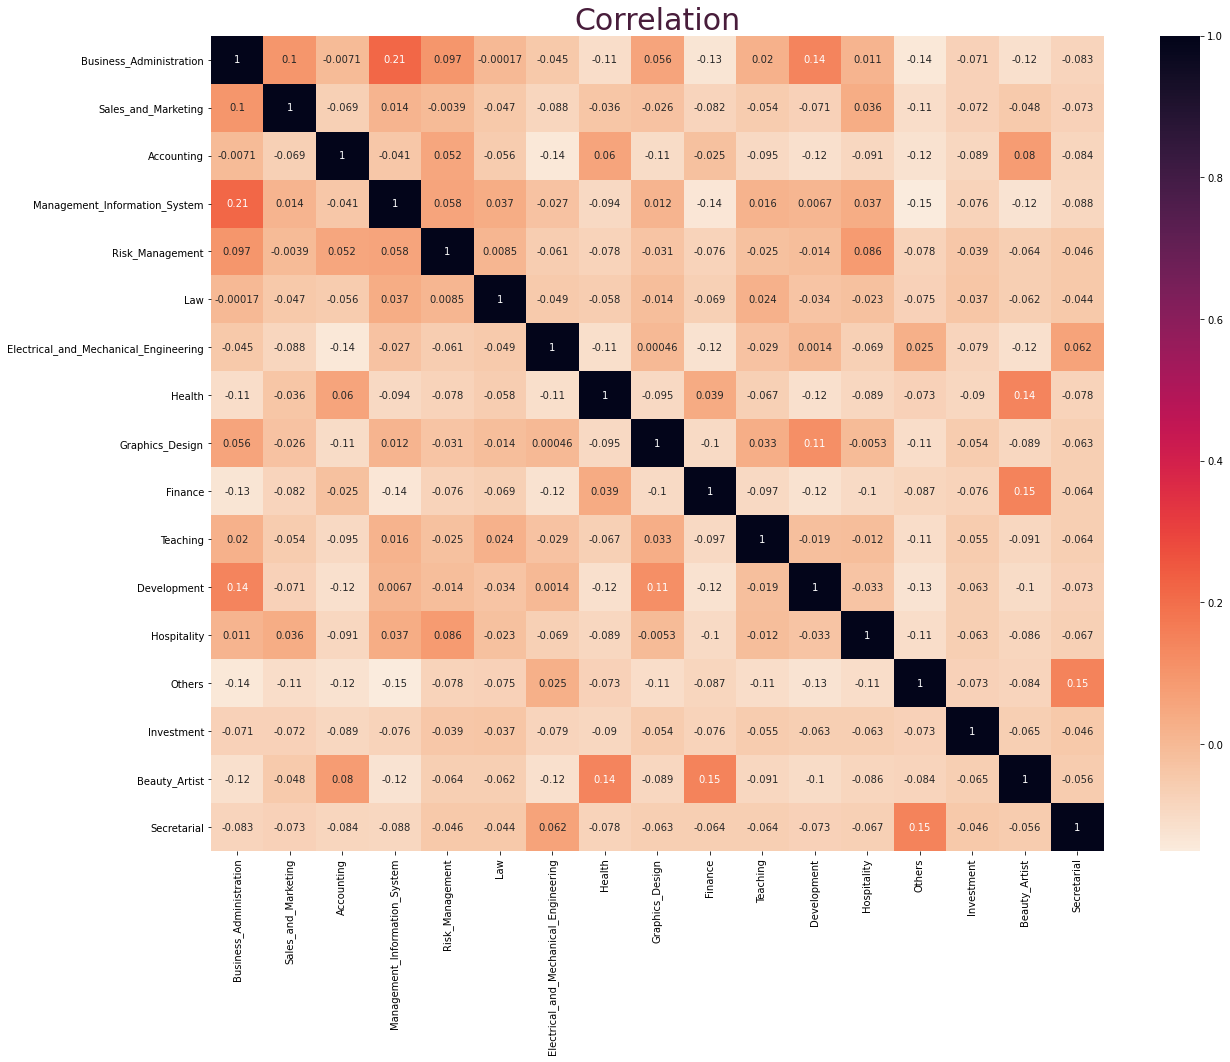

In [18]:
plt.figure(figsize = [20,15])
sns.heatmap(corr, annot = True, cmap = sns.cm.rocket_r );
plt.title('Correlation', color= '#481D3B', fontsize=30);

# Model Selection

### 1- One Vs Rest Classifier with Logistic Regression 

#### Model Fitting

In [19]:
model = OneVsRestClassifier(LogisticRegression()).fit(X_train, y_train)

#### Model Prediction

In [20]:
y_pred = model.predict(X_val)

#### Model Scores

In [21]:
getScores(model, X_train, y_train, X_val, y_val, y_pred)

Training Score  0.7588525324966383
Validation Score  0.8064516129032258
Precision: 0.8065,   Recall: 0.8065, f1: 0.8065


### 2- One Vs Rest Classifier with Random Forest Classifier 

#### Model Fitting

In [22]:
model = OneVsRestClassifier(RandomForestClassifier(n_estimators=40)).fit(X_train, y_train)

#### Model Prediction

In [23]:
y_pred = model.predict(X_val)

#### Model Scores

In [24]:
getScores(model, X_train, y_train, X_val, y_val, y_pred)

Training Score  1.0
Validation Score  0.9247311827956989
Precision: 0.9247,   Recall: 0.9247, f1: 0.9247


### 3- One Vs Rest Classifier with Extra Trees Classifier

#### Model Fitting

In [25]:
model = OneVsRestClassifier(ExtraTreesClassifier(n_estimators=41)).fit(X_train, y_train)

#### Model Prediction

In [26]:
y_pred = model.predict(X_val)

#### Model Scores

In [27]:
getScores(model, X_train, y_train, X_val, y_val, y_pred)

Training Score  1.0
Validation Score  0.9390681003584229
Precision: 0.9391,   Recall: 0.9391, f1: 0.9391


### 4- One Vs Rest Classifier with Decision Tree Classifier

#### Model Fitting

In [28]:
model = OneVsRestClassifier(DecisionTreeClassifier(max_depth=2)).fit(X_train, y_train)

#### Model Prediction

In [29]:
y_pred = model.predict(X_val)

#### Model Scores

In [30]:
getScores(model, X_train, y_train, X_val, y_val, y_pred)

Training Score  0.9099058718063648
Validation Score  0.9032258064516129
Precision: 0.9032,   Recall: 0.9032, f1: 0.9032


### 5- One Vs Rest Classifier with BernoulliNB

#### Model Fitting

In [31]:
model = OneVsRestClassifier(BernoulliNB()).fit(X_train, y_train)

#### Model Prediction

In [32]:
y_pred = model.predict(X_val)

#### Model Scores

In [33]:
getScores(model, X_train, y_train, X_val, y_val, y_pred)

Training Score  0.34289556252801434
Validation Score  0.2903225806451613
Precision: 0.2903,   Recall: 0.2903, f1: 0.2903


### 6- One Vs Rest Classifier with XGB Classifier

#### Model Fitting

In [34]:
model = OneVsRestClassifier(xgb.XGBClassifier(n_estimators=50,
                        max_depth=2,
                        learning_rate=.05, 
                        subsample=.8,
                        min_child_weight=3,
                        colsample_bytree=.8,
                        random_state = 77)).fit(X_train, y_train)

[21:26:11] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:26:11] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:26:11] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

/Users/shahadsulaiman/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:26:11] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:26:11] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:26:11] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

#### Model Prediction

In [35]:
y_pred = model.predict(X_val)

#### Model Scores

In [36]:
getScores(model, X_train, y_train, X_val, y_val, y_pred)

Training Score  0.9538323621694308
Validation Score  0.931899641577061
Precision: 0.9319,   Recall: 0.9319, f1: 0.9319


### 7- One Vs Rest Classifier with GaussianNB

#### Model Fitting

In [37]:
model = OneVsRestClassifier(GaussianNB()).fit(X, y)

#### Model Prediction

In [38]:
y_pred = model.predict(X_val)

#### Model Scores

In [39]:
getScores(model, X_train, y_train, X_val, y_val, y_pred)

Training Score  0.4796055580457194
Validation Score  0.4731182795698925
Precision: 0.4731,   Recall: 0.4731, f1: 0.4731


|        Model          | Training Accuracy  | Validation Accuracy | F1      | Recall  | Precision  |
|-----------------------|--------------------|---------------------|---------|---------|------------|
| Logistic Regression   | 0.6499         | 0.6774              | 0.6774  | 0.6774  | 0.6774     |
| Decision Tree         | 0.9085         | 0.8853              | 0.8853  | 0.8853  | 0.8853     |
| Random Forest         | 1.0000         | 0.8960              | 0.8961  | 0.8961  | 0.8961     |
| Extra Trees           | 1.0000         | 0.8960              | 0.8961  | 0.8961  | 0.8961     |
| XGB                   | 0.9439         | 0.8996              | 0.8996  | 0.8996  | 0.8996     |
| Gaussian              | 0.4114         | 0.4265              | 0.4265  | 0.4265  | 0.4265     |
| Bernoulli             | 0.3366         | 0.2652              | 0.2652  | 0.2652  | 0.2652     |

# Report The Final Model

As we can see __Decision Tree__ is the best classifier, cause it has the lowest difference between training and validation accuracy 

#### Combine validation and training datasets to report the final model.

In [40]:
X_val_train = pd.concat([X_val, X_train])
y_val_train = pd.concat([y_val, y_train])

### One Vs Rest Classifier with Decision Tree Classifier

#### Model Fitting

In [41]:
model = OneVsRestClassifier(DecisionTreeClassifier(max_depth=2)).fit(X_val_train, y_val_train)

#### Model Prediction

In [42]:
y_pred = model.predict(X_test)

In [ ]:
y_pred2

#### Model Scores

In [43]:
print("Training Score ",model.score(X_val_train, y_val_train))
print("Testing Score ",model.score(X_test, y_test))
print("Precision: {:6.4f},   Recall: {:6.4f}, f1: {:6.4f}".format(precision_score(y_test, y_pred, average='micro'), 
                                                     recall_score(y_test, y_pred, average='micro'),
                                                        f1_score(y_test,y_pred,average='micro')))

Training Score  0.9127490039840638
Testing Score  0.8351254480286738
Precision: 0.8351,   Recall: 0.8351, f1: 0.8351
